In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py # common package to interact with a dataset that is stored on an H5 file.
import scipy
# from PIL import Image
from scipy import ndimage

In [2]:
def load_dataset():
    file_name=  'train_catvnoncat.h5'
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name=  'test_catvnoncat.h5'
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

In [3]:
X_train,Y_train, X_test, Y_test, classes = load_dataset()
# Note : in case file not found, uncomment to print path in previous step and correct to necessary exrension
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('Y_train.shape= ',Y_train.shape)
print ('Y_test.shape= ',Y_test.shape)

# YOUR_CODE.   get m_train, num_px and m_test
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]

X_train.shape=  (209, 64, 64, 3)
X_test.shape=  (50, 64, 64, 3)
Y_train.shape=  (209, 1)
Y_test.shape=  (50, 1)


In [4]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


y = [1], it's a 'cat' picture.


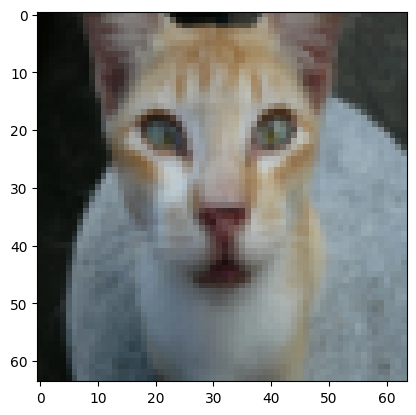

In [5]:
# Example of a picture
index = 11
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

y = [0], it's a 'non-cat' picture.


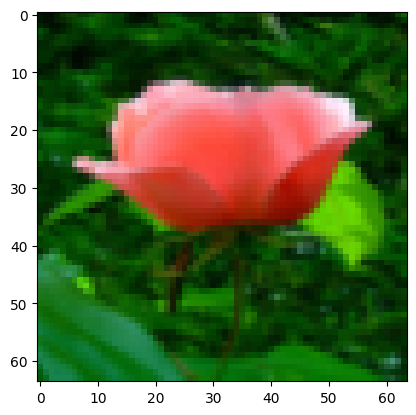

In [6]:
index = 3
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

In [7]:
print ('Label 1 count:', np.sum(Y_train!=0))
print ('Label 0 count:', np.sum(Y_train==0))

Label 1 count: 72
Label 0 count: 137


In [8]:
# YOUR_CODE. Reshape the training and test set to shape (number_of_samples,  num_px*num_px*3)
X_train_flatten = X_train.reshape(m_train, num_px*num_px*3)
X_test_flatten = X_test.reshape(m_test, num_px*num_px*3)

print ("train_set_x_flatten shape: {}".format(X_train_flatten.shape))
print ("test_set_x_flatten shape: {}".format(X_test_flatten.shape))
print ("sanity check after reshaping: {}".format(X_train_flatten[0, :5]))

train_set_x_flatten shape: (209, 12288)
test_set_x_flatten shape: (50, 12288)
sanity check after reshaping: [17 31 56 22 33]


In [9]:
# Normaliztion
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

In [10]:
def sigmoid(z):

    # YOUR_CODE. Implement sigmoid function
    g = 1/(1+np.exp(-z))
    
    return g

print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [11]:
def initialize_with_zeros(dim):
    
    # YOUR_CODE.  Initialize b to zero and w as a vector of zeros. 
    w = np.zeros(shape = (1,dim))
    b = 0

    assert(w.shape == (1,dim))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0. 0.]]
b = 0


In [12]:
# GRADED FUNCTION: propagate
def propagate(w, b, X, Y, C=1):
    
    m = X.shape[0]

    Z = np.dot(X, w.T) + b
    A = 1 / (1 + np.exp(-Z))
    cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + (C / (2 * m)) * np.sum(w**2)

    # Backward propagation
    dZ = A - Y
    dJ_dw = (np.dot(dZ.T, X) + C * w) / m
    dJ_db = np.sum(dZ) / m


    assert(dJ_dw.shape == w.shape)
    assert(dJ_db.dtype == float)
    assert(cost.dtype == float)

    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return grads, cost

w, b, X, Y = np.array([[1., 2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T, np.array([[1,0,1]]).T
grads, cost = propagate(w, b, X, Y)
print ("dJ_dw = " + str(grads["dJ_dw"]))
print ("dJ_db = " + str(grads["dJ_db"]))
print ("cost = " + str(cost))

dJ_dw = [[1.33178935 3.06173906]]
dJ_db = 0.001455578136784208
cost = 6.6348786527278865


In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, C= 1, verbose = False):

    costs = [] # keep history for plotting if necessary 
    
    for i in range(num_iterations):        

    
        # YOUR_CODE.  Call to compute cost and gradient 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dJ_dw = grads["dJ_dw"]
        dJ_db = grads["dJ_db"]
        
        # YOUR_CODE.  Update paramaters 
        w = w - learning_rate * dJ_dw
        b = b - learning_rate * dJ_db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if verbose and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return params, grads, costs

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, verbose = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dJ_dw"]))
print ("db = " + str(grads["dJ_db"]))

w = [[ 0.08006006 -0.02399336]]
b = 1.9060971483059892
dw = [[0.62090316 1.19256883]]
db = 0.2084129285706479


In [14]:
def predict(w, b, X):
    m,n = X.shape
    print(X.shape)
    assert (w.shape==(1,n))
 
    # YOUR_CODE.  Compute "A" predicting the probabilities of a cat being present in the picture
    Z = np.dot(X, w.T) + b
    A = 1 / (1 + np.exp(-Z))

    # YOUR_CODE.  Convert probabilities to actual predictions 0 or 1   
    Y_prediction = np.where(A > 0.5, 1, 0)
    assert(Y_prediction.shape == (m, 1))
    
    return Y_prediction

w = np.array([[0.1124579],[0.23106775]]).T
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T
print ("predictions = \n{}".format (predict(w, b, X)))

(3, 2)
predictions = 
[[1]
 [1]
 [0]]


[[0. 0. 0. ... 0. 0. 0.]] 0
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584911
Cost after iteration 200: 0.468157
Cost after iteration 300: 0.377985
Cost after iteration 400: 0.333494
Cost after iteration 500: 0.305956
Cost after iteration 600: 0.283224
Cost after iteration 700: 0.264051
Cost after iteration 800: 0.247613
Cost after iteration 900: 0.233335
Cost after iteration 1000: 0.220802
Cost after iteration 1100: 0.209705
Cost after iteration 1200: 0.199806
Cost after iteration 1300: 0.190921
Cost after iteration 1400: 0.182902
Cost after iteration 1500: 0.175630
Cost after iteration 1600: 0.169008
Cost after iteration 1700: 0.162955
Cost after iteration 1800: 0.157403
Cost after iteration 1900: 0.152296
Cost after iteration 2000: 0.147584
Cost after iteration 2100: 0.143226
Cost after iteration 2200: 0.139186
Cost after iteration 2300: 0.135433
Cost after iteration 2400: 0.131939
Cost after iteration 2500: 0.128679
Cost after iteration 2600: 0.125634
Cost after i

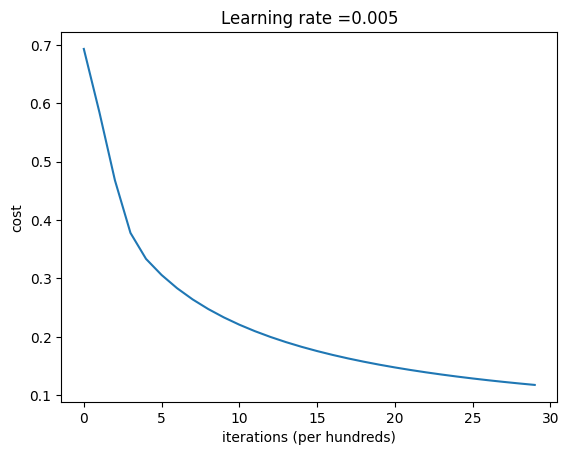

In [30]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, verbose = False, C= 1):
    """
    Builds the logistic regression model by calling the functions implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of examples, num_px * num_px * 3)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (number of examples,1)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    C- regularization parameter 
    
    Returns:
    res -- dictionary containing information about the model.
    """

    #  initialize parameters
    dim = X_train.shape[1]
    w, b = initialize_with_zeros(dim)
    print(w,b)
    # run gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, C, verbose)
    
    # retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']
    
    # predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # END_CODE 

    # Print train/test Errors
    print("train accuracy= {:.3%}".format(np.mean(Y_prediction_train == Y_train)))
    print("test accuracy= {:.3%}".format(np.mean(Y_prediction_test == Y_test)))
    
    res = {'costs': costs,
           'Y_prediction_test': Y_prediction_test, 
           'Y_prediction_train' : Y_prediction_train, 
           'w' : w, 
           'b' : b,
           'learning_rate' : learning_rate,
           'num_iterations': num_iterations,
           'C':C
          }
    
    return res

res = model(X_train= X_train_scaled,
            Y_train=Y_train, 
            X_test=X_test_scaled, 
            Y_test= Y_test, 
            num_iterations = 3000, 
            learning_rate = 0.005, 
            verbose = True,
            C= 0.3 # 0.6 is still overfitting,   0.3  is low value to keep the test accuracy ashigh as possible
           )

costs = np.squeeze(res['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(res["learning_rate"]))
plt.show()

In [ ]:
X_train